In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import glob
import os
from PIL import Image
import pandas as pd
import copy
from PIL import Image, ImageOps

In [4]:
sample_num = 0
path = 'C:/Users/ahmet/Desktop/Applied AI proj/annotated_frames'
lpath = 'C:/Users/ahmet/Desktop/Applied AI proj/projections_2d'
bpath = 'C:/Users/ahmet/Desktop/Applied AI proj/bounding_boxes'
path_save = 'C:/Users/ahmet/Desktop/Applied AI proj'

9432
C:/Users/ahmet/Desktop/Applied AI proj/annotated_frames\data_1
C:/Users/ahmet/Desktop/Applied AI proj/annotated_frames\data_2
(480, 640, 3)


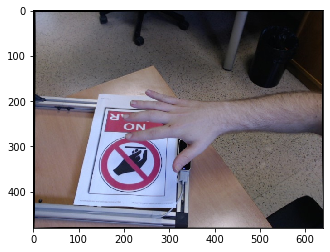

In [5]:
sample_num = 0
for folder in glob.glob(os.path.join(path,'data_'+'[1-2]')):
    sample_num += len(glob.glob(os.path.join(folder,'*.jpg')))

images = []*sample_num
print(sample_num)

for foldername in glob.glob(os.path.join(path,'data_'+'[1-2]')):
    print(foldername)
    for filename in glob.glob(os.path.join(foldername,'*.jpg')):
        #image = np.array(Image.open(filename))
        image = Image.open(filename)
        images.append(copy.copy(image))
        image.close()
        

print(np.shape(images[0]))
plt.imshow(images[0])

In [6]:
sample_num = 0
for folder in glob.glob(os.path.join(lpath,'data_'+'[1-2]')):
    sample_num += len(glob.glob(os.path.join(folder,'*.txt')))

labels = []*sample_num
print(sample_num)

for foldername in glob.glob(os.path.join(lpath,'data_'+'[1-2]')):
    print(foldername)
    for filename in glob.glob(os.path.join(foldername,'*.txt')):
        label=pd.read_csv(filename,delimiter =' ', header = None, usecols = [1,2]).values
        labels.append(label)

9432
C:/Users/ahmet/Desktop/Applied AI proj/projections_2d\data_1
C:/Users/ahmet/Desktop/Applied AI proj/projections_2d\data_2


In [7]:
sample_num = 0
for folder in glob.glob(os.path.join(bpath,'data_'+'[1-2]')):
    sample_num += len(glob.glob(os.path.join(folder,'*.txt')))

blabels = []*sample_num
print(sample_num)

for foldername in glob.glob(os.path.join(bpath,'data_'+'[1-2]')):
    print(foldername)
    for filename in glob.glob(os.path.join(foldername,'*.txt')):
        blabel=pd.read_csv(filename,delimiter =' ' , header = None, usecols = [1]).values
        blabels.append(blabel)

9432
C:/Users/ahmet/Desktop/Applied AI proj/bounding_boxes\data_1
C:/Users/ahmet/Desktop/Applied AI proj/bounding_boxes\data_2


6358


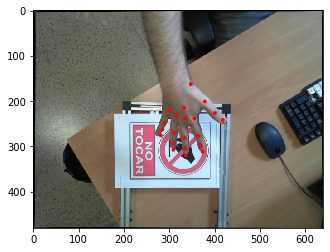

In [18]:
from matplotlib.patches import Circle
import random
i = random.randint(1,8000)

print(i)
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(images[i])

for xx,yy in labels[i]:
    circ = Circle((xx,yy),3, color = 'red')
    ax.add_patch(circ)

In [19]:
print(len(images))
print(len(labels))
print(len(blabels))

9432
9432
9432


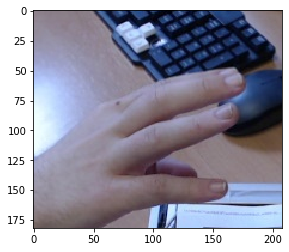

In [9]:
myrandom=random.randint(1,30)
for i,_ in enumerate(images):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    plt.imshow(images[i].crop((l,t,r,b)))
    
    if(i==myrandom):
        break
    
    
    

In [20]:
mh,mw = 0,0
for i,_ in enumerate(blabels):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    
    if(b-t>mh):
        mh=b-t
    if(r-l>mw):
        mw=r-l
        
print(mh,mw)

290 334


In [21]:
cropped = sample_num * []


for i,_ in enumerate(images):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    cropped.append(images[i].crop((l,t,r,b)))
    

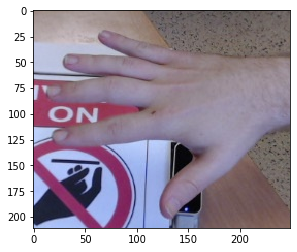

In [23]:
plt.imshow(cropped[0])

In [24]:
images = None
padded = sample_num * []


for i,item in enumerate(cropped):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    right_pad = mw-item.size[0]
    bottom_pad = mh-item.size[1]
    padded.append(ImageOps.expand(cropped[i], (0,0,right_pad,bottom_pad)))

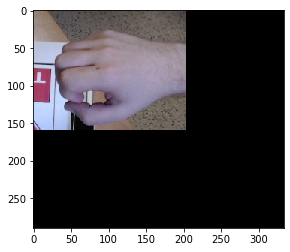

In [27]:
plt.imshow(padded[100])

In [28]:
labels = np.array(labels)

In [52]:
for i,item in enumerate(labels):
    t, l, b, r = blabels[i]
    t,l,b,r = int(t),int(l),int(b),int(r)
    labels[i,:,0] = labels[i,:,0] - l 
    labels[i,:,1] = labels[i,:,1] - t
    

In [35]:
np.amin(np.array(labels)[:,:,1])

17.775353484295294

In [36]:
print(np.shape(labels))
print(np.shape(blabels))

(9432, 21, 2)
(9432, 4, 1)


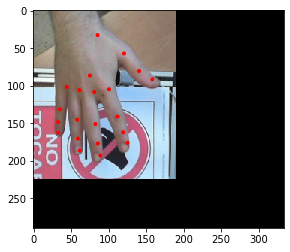

In [53]:
jo = random.randint(1,8000)
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(padded[jo])

for xx,yy in labels[jo]:
    circ = Circle((xx,yy),2, color = 'red')
    ax.add_patch(circ)

In [54]:
cropped = None
padded_pickle = sample_num * []
labels_pickle = sample_num * []
blabels_pickle = sample_num * []


for i,item in enumerate(padded):
    padded_pickle.append(np.array(padded[i]))
padded_pickle=np.array(padded_pickle)    

for i,item in enumerate(labels):
    labels_pickle.append(np.array(labels[i]))
labels_pickle=np.array(labels_pickle) 


for i,item in enumerate(blabels):
    blabels_pickle.append(np.array(blabels[i]))
blabels_pickle=np.array(blabels_pickle) 

In [55]:
print(padded_pickle.shape)
print(labels_pickle.shape)
print(blabels_pickle.shape)


(9432, 290, 334, 3)
(9432, 21, 2)
(9432, 4, 1)


In [56]:
my_dict = {'padded':padded_pickle,'labels':labels_pickle,'blabels':blabels_pickle}

for key in my_dict.keys():
    print(my_dict[key].shape)


(9432, 290, 334, 3)
(9432, 21, 2)
(9432, 4, 1)


In [57]:
with open('data_hand_pose3.pickle','wb') as file_to_dump:
    pickle.dump(my_dict,file_to_dump)

    

In [ ]:
file_to_dump=open('data_hand_pose3.pickle','wb')
pickle.dump(my_dict,file_to_dump)

file_to_dump.close()